## DAV Exam 2020

In [2]:
# All Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

### Q.1

##### (a)

In [2]:
List1 = ['Good Morning', 'Good Evening', 'Hello', 'Good afternoon', 
         'Greetings','Good Morning', 'Nice to see you']

List1

['Good Morning',
 'Good Evening',
 'Hello',
 'Good afternoon',
 'Greetings',
 'Good Morning',
 'Nice to see you']

In [3]:
NewList = [*set(List1)] # one way
NewList2 = [List1[x] for x in range(len(List1)) if List1[x] not in List1[0:x]] # another way
print('\nNewList :\n', NewList)
print('\nNewList2 :\n', NewList2)


NewList :
 ['Hello', 'Nice to see you', 'Good Morning', 'Good afternoon', 'Good Evening', 'Greetings']

NewList2 :
 ['Good Morning', 'Good Evening', 'Hello', 'Good afternoon', 'Greetings', 'Nice to see you']


In [4]:
List1.sort(key=lambda x: x[-1])
List1

['Good Morning',
 'Good Evening',
 'Good Morning',
 'Good afternoon',
 'Hello',
 'Greetings',
 'Nice to see you']

#### (b)

In [5]:
Anydict = {}

for x in List1:
    c = x.count(' ') + 1;
    if c in Anydict.keys():
        Anydict[c].append(x)
    else:
        Anydict[c] = [x]

Anydict = dict(sorted(Anydict.items()))
Anydict

{1: ['Hello', 'Greetings'],
 2: ['Good Morning', 'Good Evening', 'Good Morning', 'Good afternoon'],
 4: ['Nice to see you']}

In [6]:
Ds1 = pd.Series(Anydict)
Ds1 

1                                   [Hello, Greetings]
2    [Good Morning, Good Evening, Good Morning, Goo...
4                                    [Nice to see you]
dtype: object

#### (c)

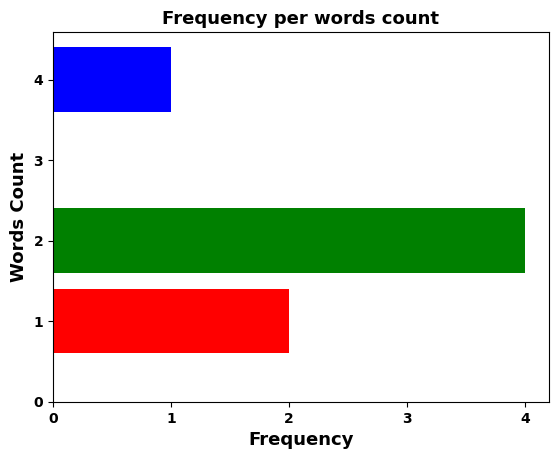

In [7]:
f = [len(x) for x in Ds1]
plt.barh(Ds1.index, f, color=['r','g','b','y'])
plt.title("Frequency per words count", fontsize=13, fontweight="bold")
plt.ylabel("Words Count", fontweight = 'bold', fontsize=13)
plt.xlabel("Frequency", fontweight = 'bold', fontsize=13)
plt.yticks(range(max(Ds1.index)+1), fontweight = 'bold')
plt.xticks(range(max(f)+1), fontweight = 'bold')
plt.show()
    

### Q.2

In [55]:
ch = np.array(['A', 'B', 'C', 'D', 'E'])
diet = np.array(['low fat', 'no fat'])
kind = np.array(["walking", "running","rest"])
EXERCISE = pd.DataFrame({
    'ID'  : np.arange(15), 
    'Name': ch.repeat(3), 
    'Diet': diet[[0,0,1,1,1,0,0,0,0,0,0,0,1,0,0]],
    'Pulse':[85,85,88,90,92,93,97,97,94,80,82,83,91,92,91],
    'Time (min)':[40,45,30,10,15,30,15,15,30,10,15,30,10,15,30],
    'Kind':kind[[0,0,1,0,2,2,2,2,0,0,2,2,2,1,1]]
})
EXERCISE

,ID,Name,Diet,Pulse,Time (min),Kind
0,0,A,low fat,85,40,walking
1,1,A,low fat,85,45,walking
2,2,A,no fat,88,30,running
3,3,B,no fat,90,10,walking
4,4,B,no fat,92,15,rest
5,5,B,low fat,93,30,rest
6,6,C,low fat,97,15,rest
7,7,C,low fat,97,15,rest
8,8,C,low fat,94,30,walking
9,9,D,low fat,80,10,walking


#### (a)

In [9]:
SELECTED = EXERCISE.set_index(['Name', 'Diet'])
SELECTED

ID  Pulse  Time (min)     Kind
Name Diet                                   
A    low fat   0     85          40  walking
     low fat   1     85          45  walking
     no fat    2     88          30  running
B    no fat    3     90          10  walking
     no fat    4     92          15     rest
     low fat   5     93          30     rest
C    low fat   6     97          15     rest
     low fat   7     97          15     rest
     low fat   8     94          30  walking
D    low fat   9     80          10  walking
     low fat  10     82          15     rest
     low fat  11     83          30     rest
E    no fat   12     91          10     rest
     low fat  13     92          15  running
     low fat  14     91          30  running

In [10]:
SELECTED.groupby(level=[0,1])['Pulse'].max()

Name  Diet   
A     low fat    85
      no fat     88
B     low fat    93
      no fat     92
C     low fat    97
D     low fat    83
E     low fat    92
      no fat     91
Name: Pulse, dtype: int64

#### (b)

In [11]:
SELECTED.loc[(['A','B'], 'low fat'),] # one way

ID  Pulse  Time (min)     Kind
Name Diet                                   
A    low fat   0     85          40  walking
     low fat   1     85          45  walking
B    low fat   5     93          30     rest

In [12]:
SELECTED.loc[(ch[(ch == 'A') | (ch == 'B')], diet[diet == 'low fat']),] # another way

ID  Pulse  Time (min)     Kind
Name Diet                                   
A    low fat   0     85          40  walking
     low fat   1     85          45  walking
B    low fat   5     93          30     rest

In [13]:
SELECTED.sort_index(level=0, ascending=False) # sorting

ID  Pulse  Time (min)     Kind
Name Diet                                   
E    no fat   12     91          10     rest
     low fat  14     91          30  running
     low fat  13     92          15  running
D    low fat  11     83          30     rest
     low fat  10     82          15     rest
     low fat   9     80          10  walking
C    low fat   8     94          30  walking
     low fat   7     97          15     rest
     low fat   6     97          15     rest
B    no fat    4     92          15     rest
     no fat    3     90          10  walking
     low fat   5     93          30     rest
A    no fat    2     88          30  running
     low fat   1     85          45  walking
     low fat   0     85          40  walking

#### (c)

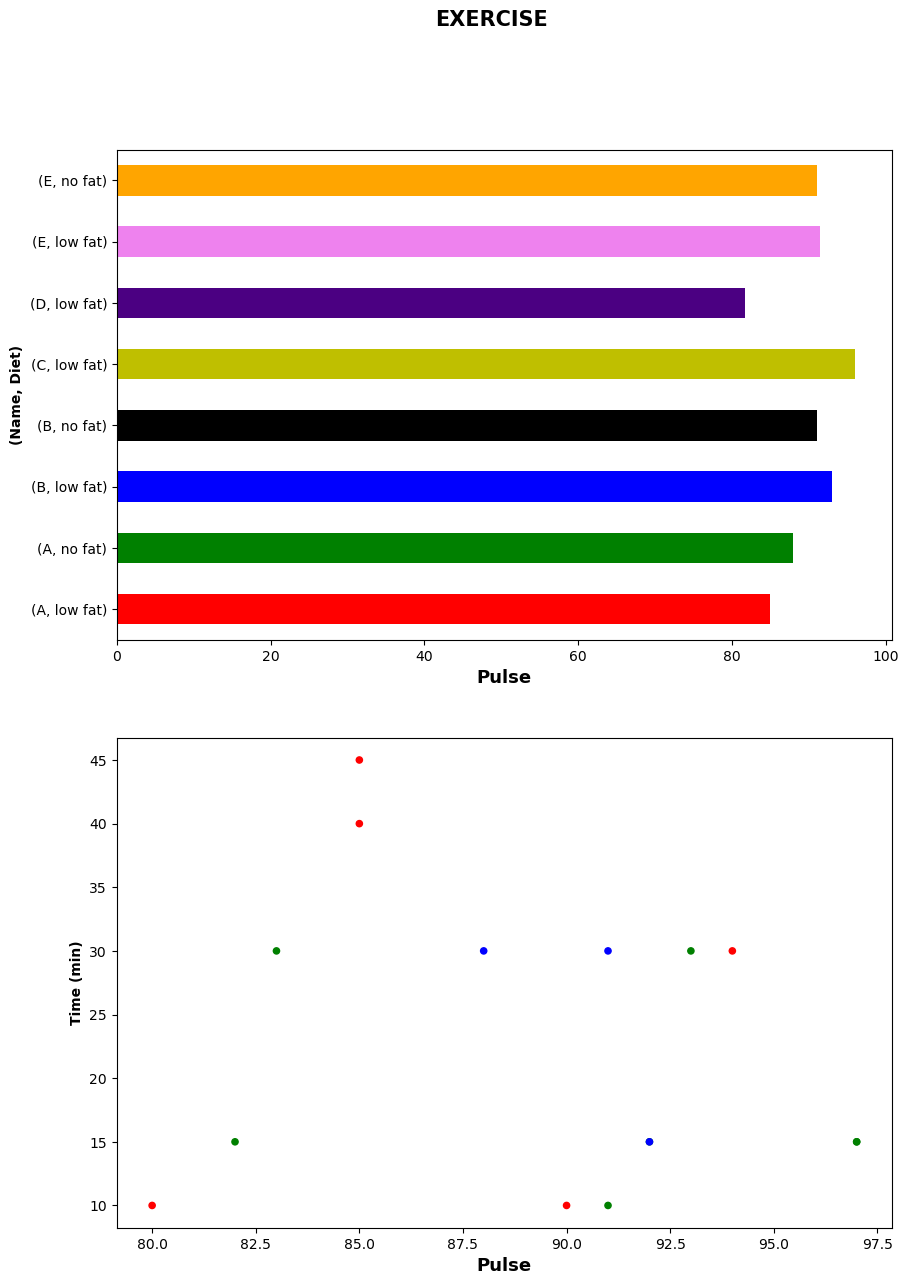

In [18]:
fig = plt.figure(figsize=(10, 14))
ax1 = fig.add_subplot(2,1,1)
EXERCISE.groupby(['Name', 'Diet'])['Pulse'].mean().plot.barh(ax=ax1, color = ['r', 'g','b','black','y','indigo', 'violet', 'orange'])
ax1.set_xlabel('Pulse', fontweight='bold', fontsize=13)
ax1.set_ylabel('(Name, Diet)',fontweight='bold')

ax2 = fig.add_subplot(2,1,2)
cmap = EXERCISE['Kind'].map({kind[0]:'r', kind[1]:'b', kind[2]:'g'})
ax2 = EXERCISE.plot.scatter(x='Pulse', y = 'Time (min)', ax = ax2, c=cmap, legend=True)
ax2.set_xlabel('Pulse', fontweight='bold', fontsize=13)
ax2.set_ylabel('Time (min)',fontweight='bold')

fig.suptitle("EXERCISE", fontsize=15, fontweight="bold")
plt.show()
fig.savefig("exerciseplot.jpeg")

### Q.3

#### (a)

In [10]:
sr = pd.Series(['Madhuri', 'AjaySh@rma', 'R@ni', 'Radha', np.nan, 'Smita', '3567'])
sr

0       Madhuri
1    AjaySh@rma
2          R@ni
3         Radha
4           NaN
5         Smita
6          3567
dtype: object

In [17]:
sr.apply(lambda x: len(x) if type(x) == str else None)

0     7.0
1    10.0
2     4.0
3     5.0
4     NaN
5     5.0
6     4.0
dtype: float64

In [18]:
sr.apply(lambda x: x.replace("@", "a") if type(x) == str else None)

0       Madhuri
1    AjaySharma
2          Rani
3         Radha
4          None
5         Smita
6          3567
dtype: object

In [21]:
sr.apply(lambda x: x.count("a") if type(x) == str else None) 

0    1.0
1    2.0
2    0.0
3    2.0
4    NaN
5    1.0
6    0.0
dtype: float64

In [22]:
sr.apply(lambda x: x.swapcase() if type(x) == str else None) 

0       mADHURI
1    aJAYsH@RMA
2          r@NI
3         rADHA
4          None
5         sMITA
6          3567
dtype: object

In [23]:
sr.apply(lambda x: x.find('adh') if type(x) == str else None)

0    1.0
1   -1.0
2   -1.0
3    1.0
4    NaN
5   -1.0
6   -1.0
dtype: float64

In [24]:
sr.apply(lambda x : x.endswith("i") if type(x) == str else None)

0     True
1    False
2     True
3    False
4     None
5    False
6    False
dtype: object

#### (b)

In [39]:
df = pd.DataFrame(np.random.randint(1,100, size=(7,7)))
df

,0,1,2,3,4,5,6
0,52,6,89,50,78,93,40
1,83,71,43,30,87,84,27
2,87,85,6,49,5,58,37
3,85,61,44,12,32,13,40
4,73,90,83,20,77,50,63
5,84,81,5,94,91,8,48
6,42,77,77,55,67,95,77


In [40]:
for i in range(1,7):
    print(i, i+1, df.corrwith(df.iloc[i-1]).loc[i])

1 2 0.28918086782341307
2 3 0.11991930529168267
3 4 0.1618887963954778
4 5 0.19097662995526835
5 6 0.6830625202201227
6 7 -0.04736934563575663


In [32]:
df.iloc[0]

0    29
1    53
2    19
3    46
4    61
5    57
6    12
Name: 0, dtype: int64

#### (c)

In [41]:
ar = np.random.randint(51,150, 100)
ar

array([138,  74,  89,  86, 146, 140, 146, 117, 123, 142,  94, 119, 115,
        85,  82, 138,  54, 146,  85, 146, 104, 126,  84,  79, 124, 114,
        95,  92, 145, 147,  72,  83,  55, 112, 113, 141, 139,  65, 114,
       123,  95, 149,  95,  76,  97, 134,  76,  66, 147,  86,  93,  94,
       138, 123, 145,  80, 110,  82,  73,  62,  57,  85,  57,  61, 133,
       103,  84, 148,  85,  65, 113, 109, 112, 127, 136,  85,  60, 128,
       136, 109, 140, 141,  60, 146,  82,  75, 107, 138,  86, 131,  54,
       116,  84,  53, 120,  77,  76,  99, 126,  94])

In [42]:
ar.argmax()

41

In [43]:
ar.argmin()

93

In [46]:
ar2 = ar.reshape(10,10)

In [51]:
np.fill_diagonal(ar2, 1)
ar2

array([[  1,  74,  89,  86, 146, 140, 146, 117, 123, 142],
       [ 94,   1, 115,  85,  82, 138,  54, 146,  85, 146],
       [104, 126,   1,  79, 124, 114,  95,  92, 145, 147],
       [ 72,  83,  55,   1, 113, 141, 139,  65, 114, 123],
       [ 95, 149,  95,  76,   1, 134,  76,  66, 147,  86],
       [ 93,  94, 138, 123, 145,   1, 110,  82,  73,  62],
       [ 57,  85,  57,  61, 133, 103,   1, 148,  85,  65],
       [113, 109, 112, 127, 136,  85,  60,   1, 136, 109],
       [140, 141,  60, 146,  82,  75, 107, 138,   1, 131],
       [ 54, 116,  84,  53, 120,  77,  76,  99, 126,   1]])

In [53]:
np.reciprocal(ar2)  # =>  reciprocal of element = 1/element

array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]])

### Q4

#### (a)

In [57]:
EXERCISE['Diet'] = EXERCISE['Diet'].map(lambda x: x.upper())
EXERCISE

,ID,Name,Diet,Pulse,Time (min),Kind
0,0,A,LOW FAT,85,40,walking
1,1,A,LOW FAT,85,45,walking
2,2,A,NO FAT,88,30,running
3,3,B,NO FAT,90,10,walking
4,4,B,NO FAT,92,15,rest
5,5,B,LOW FAT,93,30,rest
6,6,C,LOW FAT,97,15,rest
7,7,C,LOW FAT,97,15,rest
8,8,C,LOW FAT,94,30,walking
9,9,D,LOW FAT,80,10,walking


In [59]:
EXERCISE.to_csv("Exercise.csv", index=False)

#### (b)

In [71]:
data = pd.read_csv('Exercise.csv', index_col=['Name', 'Diet'], skiprows=(lambda x:x <= 5))


ValueError: Index Name invalid

In [80]:
a = np.linspace(1, 100, 6).reshape(2,3)
a

array([[  1. ,  20.8,  40.6],
       [ 60.4,  80.2, 100. ]])

In [87]:
np.diag(a)


array([ 1. , 80.2])

In [75]:

np.diag()

array([1., 1.])